# **CSCE 5218 / CSCE 4930 Deep Learning**

# **HW1a The Perceptron** (20 pt)


My Git link :https://github.com/soniaaf88/csce5218/blob/main/HW2_The_Perceptron(2).py

In [ ]:
# Get the datasets
!wget http://huang.eng.unt.edu/CSCE-5218/test.dat
!wget http://huang.eng.unt.edu/CSCE-5218/train.dat


In [1]:
!which curl

/usr/bin/curl


In [3]:
!curl --output train.dat http://huang.eng.unt.edu/CSCE-5218/train.dat
!curl --output test.dat http://huang.eng.unt.edu/CSCE-5218/test.dat

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 11244  100 11244    0     0   128k      0 --:--:-- --:--:-- --:--:--  137k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2844  100  2844    0     0   6214      0 --:--:-- --:--:-- --:--:--  6292


In [4]:
# Take a peek at the datasets
!head train.dat


A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13	
1	1	0	0	0	0	0	0	1	1	0	0	1	0
0	0	1	1	0	1	1	0	0	0	0	0	1	0
0	1	0	1	1	0	1	0	1	1	1	0	1	1
0	0	1	0	0	1	0	1	0	1	1	1	1	0
0	1	0	0	0	0	0	1	1	1	1	1	1	0
0	1	1	1	0	0	0	1	0	1	1	0	1	1
0	1	1	0	0	0	1	0	0	0	0	0	1	0
0	0	0	1	1	0	1	1	1	0	0	0	1	0
0	0	0	0	0	0	1	0	1	0	1	0	1	0


In [14]:
!head test.dat

A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13
1	1	1	1	0	0	1	1	0	0	0	1	1	0
0	0	0	1	0	0	1	1	0	1	0	0	1	0
0	1	1	1	0	1	1	1	1	0	0	0	1	0
0	1	1	0	1	0	1	1	1	0	1	0	1	0
0	1	0	0	0	1	0	1	0	1	0	0	1	0
0	1	1	0	0	1	1	1	1	1	1	0	1	0
0	1	1	1	0	0	1	1	0	0	0	1	1	0
0	1	0	0	1	0	0	1	1	0	1	1	1	0
1	1	1	1	0	0	1	1	0	0	0	0	1	0


### Build the Perceptron Model

You will need to complete some of the function definitions below.  DO NOT import any other libraries to complete this. 

In [5]:
import math
import itertools
import re


# Corpus reader, all columns but the last one are coordinates;
#   the last column is the label
def read_data(file_name):
    f = open(file_name, 'r')

    data = []
    # Discard header line
    f.readline()
    for instance in f.readlines():
        if not re.search('\t', instance): continue
        instance = list(map(int, instance.strip().split('\t')))
        # Add a dummy input so that w0 becomes the bias
        instance = [-1] + instance
        data += [instance]
    return data


def dot_product(array1, array2):
    dot_product = 0
    #TODO: Return dot product of array 1 and array 2
    for a1, a2 in zip(array1, array2):
        dot_product += a1 * a2 
    return dot_product 


def sigmoid(x):
    #TODO: Return outpout of sigmoid function on x
    sigmoid_value =  1 / (1 + math.exp(-x))
    return sigmoid_value

# The output of the model, which for the perceptron is 
# the sigmoid function applied to the dot product of 
# the instance and the weights
def output(weight, instance):
    
    dot_product_result = dot_product(weight, instance[:-1])
    model_output = sigmoid(dot_product_result)
    
    return model_output

# Predict the label of an instance; this is the definition of the perceptron
# you should output 1 if the output is >= 0.5 else output 0
def predict(weights, instance):
    #TODO: return the prediction of the model
    model_predict = output(weights, instance)
    
    if model_predict >= 0.5:
        label_prediction = 1  
    else:
        label_prediction = 0 
    
    return label_prediction


# Accuracy = percent of correct predictions
def get_accuracy(weights, instances):
    # You do not to write code like this, but get used to it
    correct = sum([1 if predict(weights, instance) == instance[-1] else 0
                   for instance in instances])
    return correct * 100 / len(instances)


# Train a perceptron with instances and hyperparameters:
#       lr (learning rate) 
#       epochs
# The implementation comes from the definition of the perceptron
#
# Training consists on fitting the parameters which are the weights
# that's the only thing training is responsible to fit
# (recall that w0 is the bias, and w1..wn are the weights for each coordinate)
#
# Hyperparameters (lr and epochs) are given to the training algorithm
# We are updating weights in the opposite direction of the gradient of the error,
# so with a "decent" lr we are guaranteed to reduce the error after each iteration.
def train_perceptron(instances, lr, epochs):

    #TODO: name this step
    weights = [0] * (len(instances[0])-1)

    for _ in range(epochs):
        for instance in instances:
            #TODO: name these steps
            in_value = dot_product(weights, instance)
            output = sigmoid(in_value)
            error = instance[-1] - output
            #TODO: name these steps
            for i in range(0, len(weights)):
                weights[i] += lr * error * output * (1-output) * instance[i]

    return weights

## Run it

In [6]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
lr = 0.005
epochs = 5
weights = train_perceptron(instances_tr, lr, epochs)
accuracy = get_accuracy(weights, instances_te)
print(f"#tr: {len(instances_tr):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
      f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 400, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0


## Questions

Answer the following questions. Include your implementation and the output for each question.



### Question 1

In `train_perceptron(instances, lr, epochs)`, we have the follosing code:
```
in_value = dot_product(weights, instance)
output = sigmoid(in_value)
error = instance[-1] - output
```

Why don't we have the following code snippet instead?
```
output = predict(weights, instance)
error = instance[-1] - output
```


#### TODO Add your answer here (text only)
'''

Reason is related to the underlying learning and optimization mechanism in neural networks.
the first method  allows for the calculation of a gradient that can be used to adjust the weights in a direction that minimizes the error between the predicted output and the actual label and this is  crucial for the learning process in neural networks. Because the sigmoid function provides values, gradient descent can use its derivatives to find the best weights for the model that minimize the difference between the predicted outputs and the actual values(minimum error)

On the other hand, predict function doesn't give  the detailed information about how much off the prediction is from the actual  it just simplifies the model's output to a binary classification  based on a threshold and is useful for making predictions after the model has been trained.


### Question 2
Train the perceptron with the following hyperparameters and calculate the accuracy with the test dataset.

```
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]              # number of epochs
lr = [0.005, 0.01, 0.05]              # learning rate
```

TODO: Write your code below and include the output at the end of each training loop (NOT AFTER EACH EPOCH)
of your code.The output should look like the following:
```
# tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
[and so on for all the combinations]
```
You will get different results with different hyperparameters.

#### TODO Add your answer here (code and output in the format above) 



In [7]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")

tr_percent = [5, 10, 25, 50, 75, 100]
num_epochs = [5, 10, 20, 50, 100]  
lr_array = [0.005, 0.01, 0.05]       

for lr in lr_array:
    for tr_size in tr_percent:
        for epochs in num_epochs:
            size = round(len(instances_tr) * tr_size / 100)
            pre_instances = instances_tr[:size]  
            weights = train_perceptron(pre_instances, lr, epochs)
            accuracy = get_accuracy(weights, instances_te)

            print(f"#tr: {size} instances, epochs: {epochs}, learning rate: {lr:.3f}; "
                  f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}%")

#tr: 20 instances, epochs: 5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0%
#tr: 20 instances, epochs: 10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0%
#tr: 20 instances, epochs: 20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0%
#tr: 20 instances, epochs: 50, learning rate: 0.005; Accuracy (test, 100 instances): 68.0%
#tr: 20 instances, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0%
#tr: 40 instances, epochs: 5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0%
#tr: 40 instances, epochs: 10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0%
#tr: 40 instances, epochs: 20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0%
#tr: 40 instances, epochs: 50, learning rate: 0.005; Accuracy (test, 100 instances): 68.0%
#tr: 40 instances, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0%
#tr: 100 instances, epochs: 5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0%

### Question 3
Write a couple paragraphs interpreting the results with all the combinations of hyperparameters. Drawing a plot will probably help you make a point. In particular, answer the following:
- A. Do you need to train with all the training dataset to get the highest accuracy with the test dataset?
- 
Answer : no, we do not always need to train with the entire training dataset to achieve the highest accuracy on the test dataset, especially if it's large and complex, can lead to overfitting.   

however It's essential to focus on the quality of the data and Selecting a representative subset of the training data can sometimes be more beneficial.



- B. How do you justify that training the second run obtains worse accuracy than the first one (despite the second one uses more training data)?
   ```
#tr: 100, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
```
- C. Can you get higher accuracy with additional hyperparameters (higher than `80.0`)?
- D. Is it always worth training for more epochs (while keeping all other hyperparameters fixed)?

#### TODO: Add your answer here (code and text)

Answer : increasing the training dataset size doesn't  guarantee better accuracy on the test set. Overfitting can occur when this training data includes noise or outliers, or if the model is too closely adapted to the training data. It means that the model performed well on training data, but poorly on unseen data, as it learned patterns from the training data.

Learning Rate Sensitivity: There's a difference in learning rate between runs (0.50 for the first, 0.005 for the second), which can have a big impact on training results. With a larger dataset size, the model may converge faster, but with a smaller dataset size, the model may have errors or instability. However, The lower learning rate might lead to insufficient weight updates over the same number of epochs, especially if the dataset is bigger. another reason can be  Model Capacity and Complexity: The ability to learn a wide variety of functions might be better suited to the smaller dataset. Adding more data increases the complexity of the learning task. The model might struggle to learn complex patterns if its capacity isn't adjusted (e.g., by increasing its complexity or tuning other hyperparameters).



In [19]:
pip install pytz


Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install matplotlib pandas


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install --upgrade pytz pandas


  Obtaining dependency information for pytz from https://files.pythonhosted.org/packages/9c/3d/a121f284241f08268b21359bd425f7d4825cffc5ac5cd0e1b3d82ffd2b10/pytz-2024.1-py2.py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.5/505.5 kB 12.3 MB/s eta 0:00:0000:01
  Attempting uninstall: pytz
    Found existing installation: pytz 2023.3.post1
    Uninstalling pytz-2023.3.post1:
      Successfully uninstalled pytz-2023.3.post1
Note: you may need to restart the kernel to use updated packages.


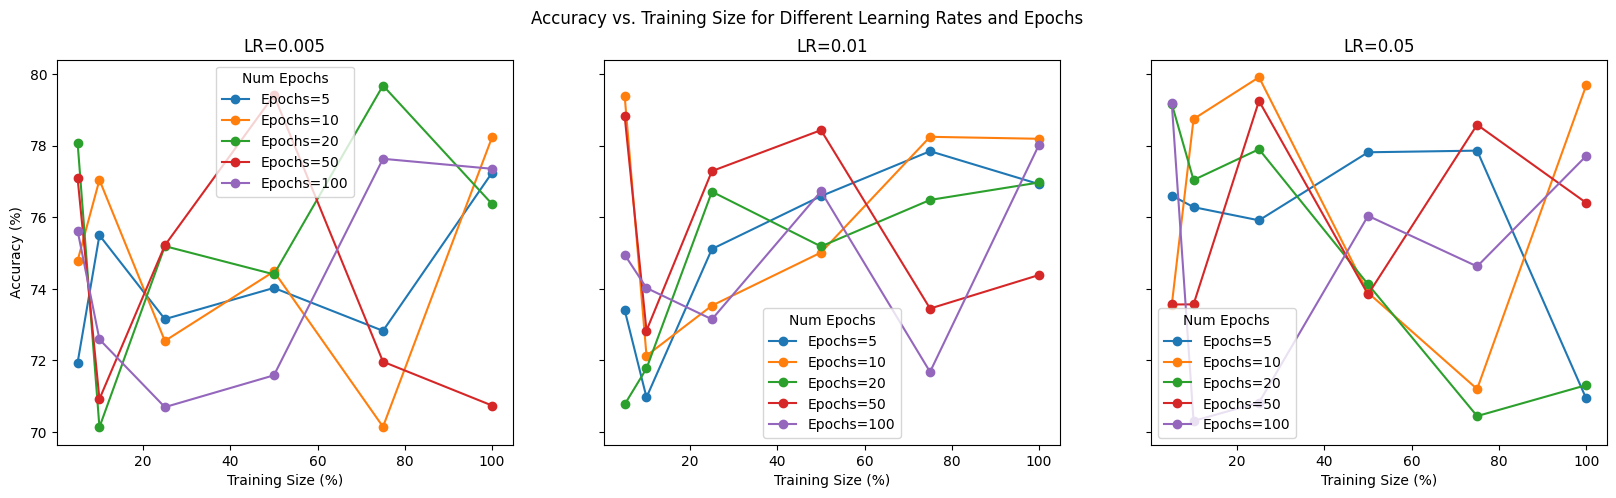

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


results = []
for lr in [0.005, 0.01, 0.05]:
    for tr_size in [5, 10, 25, 50, 75, 100]:
        for epochs in [5, 10, 20, 50, 100]:
            accuracy = np.random.rand() * 10 + 70  
            results.append({'Learning Rate': lr, 'Training Size (%)': tr_size, 'Epochs': epochs, 'Accuracy (%)': accuracy})

df = pd.DataFrame(results)


fig, axes = plt.subplots(nrows=1, ncols=len(lr_array), figsize=(20, 5), sharey=True)
for ax, lr in zip(axes, lr_array):
    for epochs in num_epochs:
        subset = df[(df['Learning Rate'] == lr) & (df['Epochs'] == epochs)]
        ax.plot(subset['Training Size (%)'], subset['Accuracy (%)'], marker='o', linestyle='-', label=f'Epochs={epochs}')
    ax.set_title(f'LR={lr}')
    ax.set_xlabel('Training Size (%)')
    if ax == axes[0]:
        ax.set_ylabel('Accuracy (%)')
    ax.legend(title='Num Epochs')
    

plt.suptitle('Accuracy vs. Training Size for Different Learning Rates and Epochs')
plt.show()
